## 1] Importing the neccessary modules for data manipulation and visual representation

In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [49]:
# Read the excel file and store our dataset into a dataframe called "df"
Air_data=pd.read_csv(r"C:\Users\parix\Projects\CITL Projects\Air Quality\Data\Air_Quality.csv")

# To handle the warning messages generated by the program
import warnings
warnings.filterwarnings("ignore")

## 2] Displaying top 5 rows

In [50]:
Air_data.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


## 3] Finding the number of rows and columns

In [51]:
Air_data.shape

(29531, 16)

# Data Preprocessing

## 4] Checking the datatype

In [52]:
Air_data.dtypes

City           object
Date           object
PM2.5         float64
PM10          float64
NO            float64
NO2           float64
NOx           float64
NH3           float64
CO            float64
SO2           float64
O3            float64
Benzene       float64
Toluene       float64
Xylene        float64
AQI           float64
AQI_Bucket     object
dtype: object

In [53]:
# Changing the data type of Date column
Air_data['Date'] = pd.to_datetime(Air_data['Date'])

In [54]:
# Displaying information about the DataFrame
Air_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   City        29531 non-null  object        
 1   Date        29531 non-null  datetime64[ns]
 2   PM2.5       24933 non-null  float64       
 3   PM10        18391 non-null  float64       
 4   NO          25949 non-null  float64       
 5   NO2         25946 non-null  float64       
 6   NOx         25346 non-null  float64       
 7   NH3         19203 non-null  float64       
 8   CO          27472 non-null  float64       
 9   SO2         25677 non-null  float64       
 10  O3          25509 non-null  float64       
 11  Benzene     23908 non-null  float64       
 12  Toluene     21490 non-null  float64       
 13  Xylene      11422 non-null  float64       
 14  AQI         24850 non-null  float64       
 15  AQI_Bucket  24850 non-null  object        
dtypes: datetime64[ns](1), 

## 5] Dealing with missing values

In [55]:
Air_data.isna().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

In [56]:
df1 = Air_data.copy()
df1['PM2.5']=df1['PM2.5'].fillna((df1['PM2.5'].median()))
df1['PM10']=df1['PM10'].fillna((df1['PM10'].median()))
df1['NO']=df1['NO'].fillna((df1['NO'].median()))
df1['NO2']=df1['NO2'].fillna((df1['NO2'].median()))
df1['NOx']=df1['NOx'].fillna((df1['NOx'].median()))
df1['NH3']=df1['NH3'].fillna((df1['NH3'].median()))
df1['CO']=df1['CO'].fillna((df1['CO'].median()))
df1['SO2']=df1['SO2'].fillna((df1['SO2'].median()))
df1['O3']=df1['O3'].fillna((df1['O3'].median()))
df1['Benzene']=df1['Benzene'].fillna((df1['Benzene'].median()))
df1['Toluene']=df1['Toluene'].fillna((df1['Toluene'].median()))
df1['Xylene']=df1['Xylene'].fillna((df1['Xylene'].median()))
df1['AQI']=df1['AQI'].fillna((df1['AQI'].median()))
df1['AQI_Bucket']=df1['AQI_Bucket'].fillna(df1['AQI_Bucket'].mode()[0])

## 6] EDA

### Dividing the dataset into Vehicular Pollution & Industrial Pollution - Pre Covid19 [2016 to 2019]


In [57]:
df = df1.copy()
df = df[df['Date'] <= ('01-01-2020')] 
df['Vehicular Pollution'] = df['PM2.5']+df['PM10']+df['NO']+df['NO2']+df['NOx']+df['NH3']+df['CO']
df['Industrial Pollution'] = df['SO2']+df['O3']+df['Benzene']+df['Toluene']+df['Xylene']
df = df.drop(['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3','Benzene','Toluene','Xylene'],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24908 entries, 0 to 29348
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   City                  24908 non-null  object        
 1   Date                  24908 non-null  datetime64[ns]
 2   AQI                   24908 non-null  float64       
 3   AQI_Bucket            24908 non-null  object        
 4   Vehicular Pollution   24908 non-null  float64       
 5   Industrial Pollution  24908 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 1.3+ MB


In [58]:
df.head()

,City,Date,AQI,AQI_Bucket,Vehicular Pollution,Industrial Pollution
0,Ahmedabad,2015-01-01,118.0,Moderate,197.31,161.02
1,Ahmedabad,2015-01-02,118.0,Moderate,194.19,71.56
2,Ahmedabad,2015-01-03,118.0,Moderate,243.90,85.22
3,Ahmedabad,2015-01-04,118.0,Moderate,199.95,70.24
4,Ahmedabad,2015-01-05,118.0,Moderate,263.48,107.32


<AxesSubplot:xlabel='Date'>

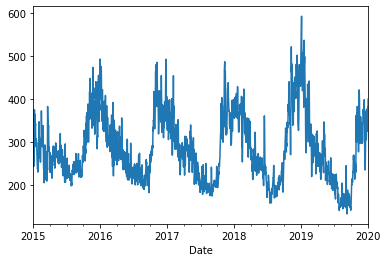

In [59]:
df.groupby('Date')['Vehicular Pollution'].mean().plot()

<AxesSubplot:xlabel='Date'>

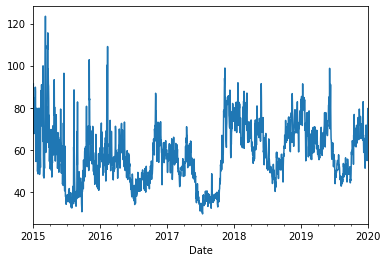

In [60]:
df.groupby('Date')['Industrial Pollution'].mean().plot()

### Checking unique values for City and AQI Bucket

In [61]:
df["City"].unique()

array(['Ahmedabad', 'Amaravati', 'Amritsar', 'Bengaluru', 'Bhopal',
       'Brajrajnagar', 'Chandigarh', 'Chennai', 'Coimbatore', 'Delhi',
       'Gurugram', 'Guwahati', 'Hyderabad', 'Jaipur', 'Jorapokhar',
       'Kolkata', 'Lucknow', 'Mumbai', 'Patna', 'Shillong', 'Talcher',
       'Thiruvananthapuram', 'Visakhapatnam'], dtype=object)

In [62]:
df["AQI_Bucket"].unique()

array(['Moderate', 'Poor', 'Very Poor', 'Severe', 'Satisfactory', 'Good'],
      dtype=object)

In [63]:
# Counting the AQI Bucket category for each city

AQI_Bucket_count = df[["City", "AQI_Bucket"]]

AQI_Bucket_count.sort_values(['City'], inplace=True, ascending=True)

count_by_city_bucket = AQI_Bucket_count.groupby(['City', 'AQI_Bucket']).size().reset_index(name='Count')

print(count_by_city_bucket)

              City    AQI_Bucket  Count
0        Ahmedabad          Good      1
1        Ahmedabad      Moderate    785
2        Ahmedabad          Poor    218
3        Ahmedabad  Satisfactory     12
4        Ahmedabad        Severe    609
..             ...           ...    ...
117  Visakhapatnam          Good     23
118  Visakhapatnam      Moderate    825
119  Visakhapatnam          Poor     73
120  Visakhapatnam  Satisfactory    342
121  Visakhapatnam     Very Poor     17

[122 rows x 3 columns]


In [64]:
AQI_Bucket_good =  AQI_Bucket_count.where(AQI_Bucket_count["AQI_Bucket"] == "Good")
AQI_Bucket_good.dropna()

,City,AQI_Bucket
204,Ahmedabad,Good
2634,Amaravati,Good
2635,Amaravati,Good
2643,Amaravati,Good
2608,Amaravati,Good
...,...,...
29103,Visakhapatnam,Good
29043,Visakhapatnam,Good
29186,Visakhapatnam,Good
29185,Visakhapatnam,Good


In [65]:
AQI_Bucket_good.value_counts()

City                AQI_Bucket
Hyderabad           Good          123
Bengaluru           Good          105
Thiruvananthapuram  Good           89
Amaravati           Good           85
Kolkata             Good           74
Amritsar            Good           72
Guwahati            Good           64
Shillong            Good           47
Visakhapatnam       Good           23
Delhi               Good           21
Gurugram            Good           21
Talcher             Good           17
Lucknow             Good           15
Chennai             Good           11
Mumbai              Good           11
Brajrajnagar        Good           11
Jorapokhar          Good           10
Coimbatore          Good            5
Jaipur              Good            4
Chandigarh          Good            2
Bhopal              Good            1
Ahmedabad           Good            1
dtype: int64

Text(3.6750000000000114, 0.5, 'Count')

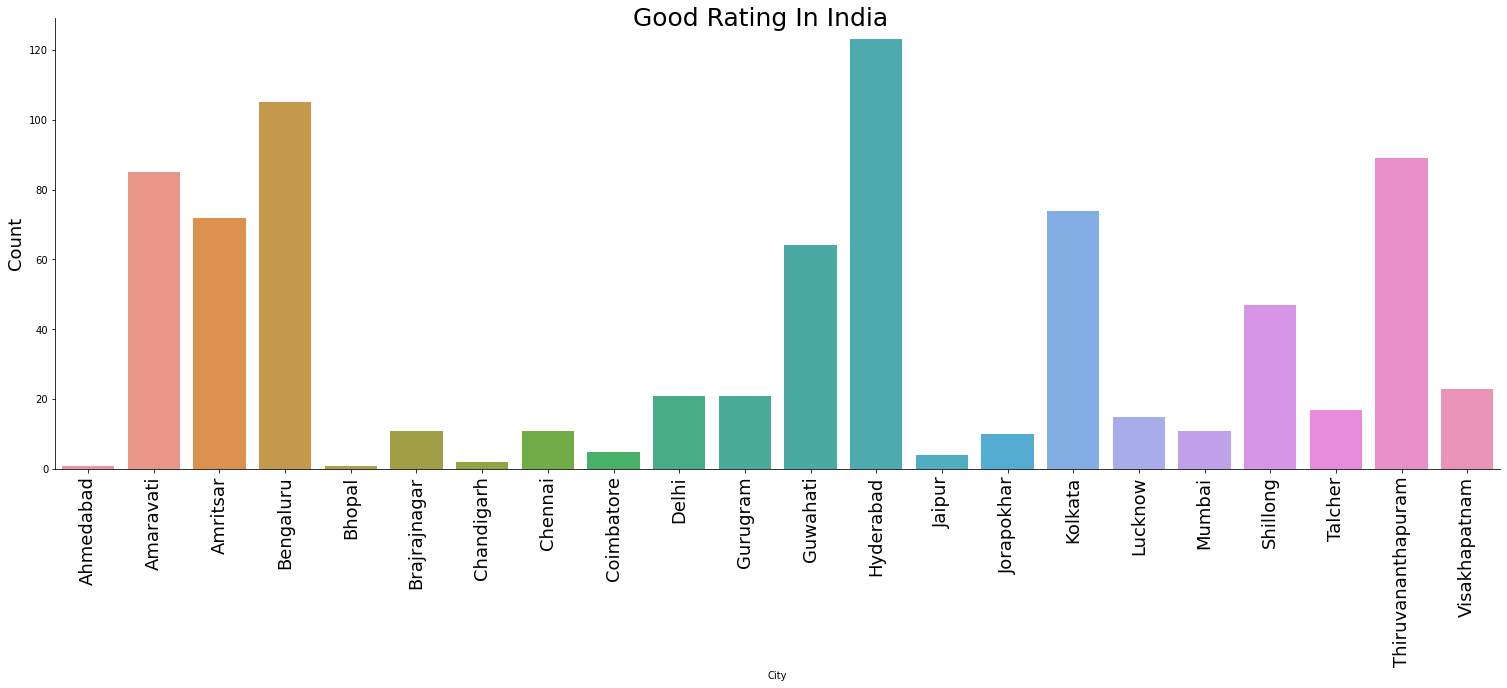

In [66]:
# Air quality ratings distributed among the cities

p1 = sns.catplot(x="City", data=AQI_Bucket_good, kind="count", height=7, aspect=3)
p1.fig.suptitle('Good Rating In India', y=1.0, fontsize=25)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
p1.set_xticklabels(fontsize=18)
plt.ylabel('Count', fontsize=18)

In [67]:
AQI_Bucket_severe =  AQI_Bucket_count.where(AQI_Bucket_count["AQI_Bucket"] == "Severe")
AQI_Bucket_severe.dropna()

,City,AQI_Bucket
1226,Ahmedabad,Severe
1225,Ahmedabad,Severe
1221,Ahmedabad,Severe
1213,Ahmedabad,Severe
1212,Ahmedabad,Severe
...,...,...
26375,Talcher,Severe
26377,Talcher,Severe
26378,Talcher,Severe
26379,Talcher,Severe


In [68]:
AQI_Bucket_severe.value_counts()

City        AQI_Bucket
Ahmedabad   Severe        609
Delhi       Severe        237
Patna       Severe        174
Lucknow     Severe        110
Gurugram    Severe         94
Talcher     Severe         24
Jorapokhar  Severe         18
Kolkata     Severe         13
Hyderabad   Severe          7
Amritsar    Severe          6
Chennai     Severe          6
Guwahati    Severe          3
Jaipur      Severe          2
dtype: int64

Text(3.6750000000000114, 0.5, 'Count')

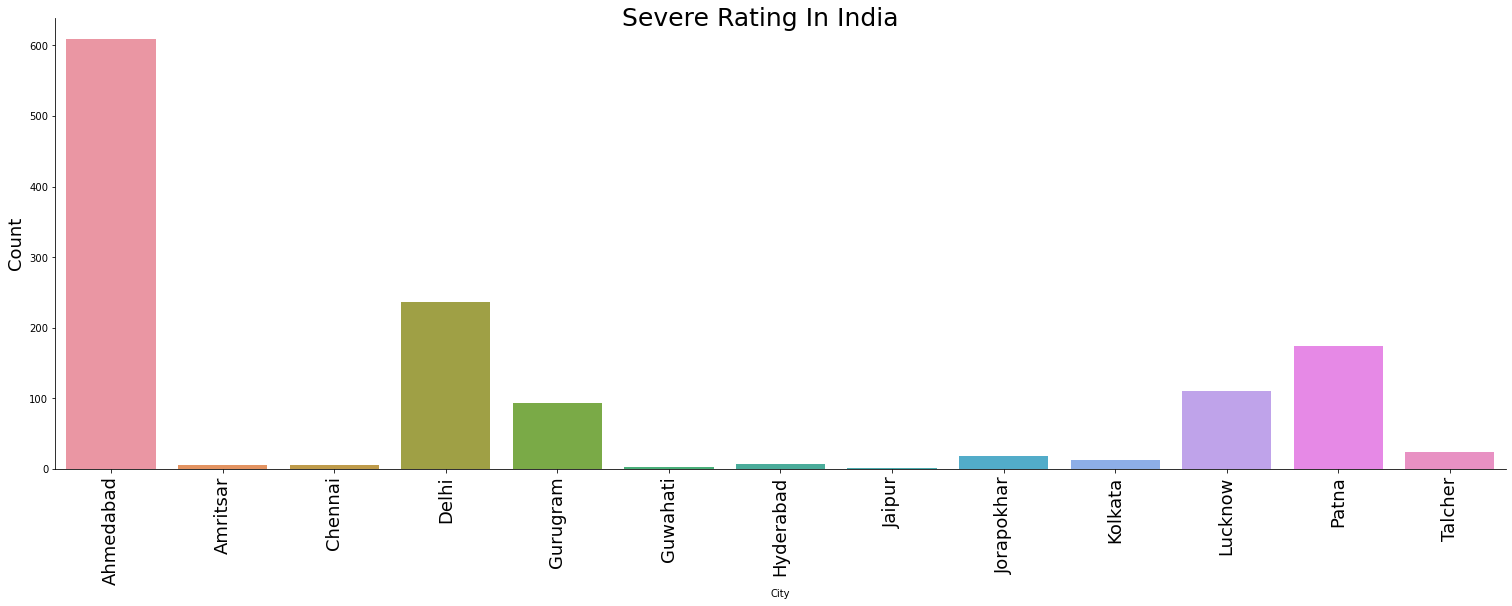

In [69]:
p2 = sns.catplot(x="City", data=AQI_Bucket_severe, kind="count", height=7, aspect=3)
p2.fig.suptitle('Severe Rating In India', y=1.0, fontsize=25)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
p2.set_xticklabels(fontsize=18)
plt.ylabel('Count', fontsize=18)

In [70]:
import plotly.express as px
from plotly.offline import iplot

In [71]:
# Define a function to create a bar plot of the cities with the highest pollution levels

def max_bar_plot(var):
    sorted_df = df[['City', var]].groupby(["City"]).mean().sort_values(by=var, ascending=True).tail(7).reset_index()
    fig = px.bar(sorted_df, x='City', y=var, color='City',
                 labels={'City': 'Cities',var: var},
                 title=f'Most polluted cities ({var})')
    fig.show()
p1 = max_bar_plot('Industrial Pollution')
p2 = max_bar_plot('Vehicular Pollution')

In [72]:
# Define a function to create a bar plot of the cities with the lowest pollution levels

def min_bar_plot(var):
    sorted_df = df[['City', var]].groupby(["City"]).mean().sort_values(by=var, ascending=True).head(7).reset_index()
    fig = px.bar(sorted_df, x='City', y=var, color='City',
                 labels={'City': 'Cities', var: var},
                 title=f'Minimum Polluted Cities ({var})')
    fig.show()
p1 = min_bar_plot('Industrial Pollution')
p2 = min_bar_plot('Vehicular Pollution')

In [73]:
# Calculating the percentage distribution of AQI category for specific cities

def al(var):
    cities = [var]
    filtered_city_day = df[df['Date'] <= '2020-04-01']
    AQI = filtered_city_day[filtered_city_day.City.isin(cities)][['City','AQI_Bucket']]
    AQI[var] = AQI['AQI_Bucket']
    k = AQI[var].value_counts()
    m = pd.DataFrame((round((k/sum(k))*100)))
    return m
p1 = al('Ahmedabad')
p2 = al('Delhi')
p3 = al('Kolkata')
p4 = al('Mumbai')
p5 = al('Bengaluru')
df_row = pd.concat([p1,p2,p3,p4,p5],axis=1)
df_row.iplot(kind='bar', align='center',xTitle='AQI Category', yTitle='Category Percentages' , title='AQI Category Distribution (Pre COVID19)')

### Dividing the dataset into Vehicular Pollution & Industrial Pollution - During Covid19 [2020]


In [74]:
df = df1.copy()
df = df[df['Date'] > ('01-01-2020')] 
df['Vehicular Pollution'] = df['PM2.5']+df['PM10']+df['NO']+df['NO2']+df['NOx']+df['NH3']+df['CO']
df['Industrial Pollution'] = df['SO2']+df['O3']+df['Benzene']+df['Toluene']+df['Xylene']
df = df.drop(['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3','Benzene','Toluene','Xylene'],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4623 entries, 1827 to 29530
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   City                  4623 non-null   object        
 1   Date                  4623 non-null   datetime64[ns]
 2   AQI                   4623 non-null   float64       
 3   AQI_Bucket            4623 non-null   object        
 4   Vehicular Pollution   4623 non-null   float64       
 5   Industrial Pollution  4623 non-null   float64       
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 252.8+ KB


In [75]:
def max_bar_plot(var):
    sorted_df = df[['City', var]].groupby(["City"]).mean().sort_values(by=var, ascending=True).tail(7).reset_index()
    fig = px.bar(sorted_df, x='City', y=var, color='City',
                 labels={'City': 'Cities',var: var},
                 title=f'Most polluted cities ({var})')
    fig.show()
p1 = max_bar_plot('Industrial Pollution')
p2 = max_bar_plot('Vehicular Pollution')

In [76]:
def min_bar_plot(var):
    sorted_df = df[['City', var]].groupby(["City"]).mean().sort_values(by=var, ascending=True).head(7).reset_index()
    fig = px.bar(sorted_df, x='City', y=var, color='City',
                 labels={'City': 'Cities', var: var},
                 title=f'Minimum Polluted Cities ({var})')
    fig.show()
p1 = min_bar_plot('Industrial Pollution')
p2 = min_bar_plot('Vehicular Pollution')

In [77]:
def al(var):
    cities = [var]
    filtered_city_day = df1[df1['Date'] > '2020-04-01']
    AQI = filtered_city_day[filtered_city_day.City.isin(cities)][['City','AQI_Bucket']]
    AQI[var] = AQI['AQI_Bucket']
    k = AQI[var].value_counts()
    m = pd.DataFrame((round((k/sum(k))*100)))
    return m
c11 = al('Ahmedabad')
c22 = al('Delhi')
c33 = al('Kolkata')
c44 = al('Mumbai')
c55 = al('Bengaluru')
df_row = pd.concat([c11,c22,c33,c44,c55],axis=1)
df_row.iplot(kind='bar', align='center',xTitle='AQI Category', yTitle='Category Percentages' ,linecolor='black', title='AQI Category Distribution (During COVID19)')


## 7] Model Building


In [78]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [79]:
categorical_attributes = list(df1.select_dtypes(include=['object']).columns)
print("categorical_attributes",categorical_attributes)
le=LabelEncoder()
df1['City']=le.fit_transform(df1['City'].astype(str))
df1['AQI_Bucket']=le.fit_transform(df1['AQI_Bucket'].astype(str))
df1.info()

categorical_attributes ['City', 'AQI_Bucket']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   City        29531 non-null  int32         
 1   Date        29531 non-null  datetime64[ns]
 2   PM2.5       29531 non-null  float64       
 3   PM10        29531 non-null  float64       
 4   NO          29531 non-null  float64       
 5   NO2         29531 non-null  float64       
 6   NOx         29531 non-null  float64       
 7   NH3         29531 non-null  float64       
 8   CO          29531 non-null  float64       
 9   SO2         29531 non-null  float64       
 10  O3          29531 non-null  float64       
 11  Benzene     29531 non-null  float64       
 12  Toluene     29531 non-null  float64       
 13  Xylene      29531 non-null  float64       
 14  AQI         29531 non-null  float64       
 15  AQI_Bucket  29531 non-nu

In [80]:
y = df1["AQI_Bucket"]
x = df1[['City', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI']]

In [81]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1234)
print(len(X_train), len(X_test), len(y_train), len(y_test))

23624 5907 23624 5907


### A] SVC

In [82]:
svc = SVC()
svc.fit(X_train, y_train)
svc_pred = svc.predict(X_test)

In [83]:
print(confusion_matrix(y_test,svc_pred))

[[ 239    0    0   21    0    0]
 [   0 2706    1    6    0    0]
 [   0   11  529    0    0    5]
 [   0   13    0 1639    0    0]
 [   0    0    0    0  253   12]
 [   0    0    2    0    5  465]]


In [84]:
print(accuracy_score(y_test, svc_pred))

0.9871339089216185


### B] Random Forest

In [85]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

In [86]:
print(confusion_matrix(y_test,rf_pred))

[[ 260    0    0    0    0    0]
 [   0 2713    0    0    0    0]
 [   0    0  545    0    0    0]
 [   0    0    0 1652    0    0]
 [   0    0    0    0  264    1]
 [   0    0    1    0    0  471]]


In [87]:
print(accuracy_score(y_test, rf_pred))

0.999661418655832


### C] XGB

In [88]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)

In [89]:
print(confusion_matrix(y_test,xgb_pred))

[[ 260    0    0    0    0    0]
 [   0 2713    0    0    0    0]
 [   0    0  545    0    0    0]
 [   0    0    0 1652    0    0]
 [   0    0    0    0  265    0]
 [   0    0    0    0    0  472]]


In [90]:
print(accuracy_score(y_test, xgb_pred))

1.0


In [91]:
final_model = pd.DataFrame({'Models':['SVC','Random Forest','XGB'],
                          'Accuracy':[accuracy_score(y_test, svc_pred)*100,
                                      accuracy_score(y_test, rf_pred)*100,
                                      accuracy_score(y_test, xgb_pred)*100
                                     ]})
final_model

,Models,Accuracy
0,SVC,98.713391
1,Random Forest,99.966142
2,XGB,100.000000
